## Problem Statement

-  A leading ride-sharing platform faces churn rate of its drivers as the constant challenge and seeking actions to be taken in ensuring driver loyalty and reducing attrition as they are crucial to the company's operation.
- Exploratory Data Analysis done and utilized DecisionTree,RandomForest and xgboost algorithms to understand factors affecting the possibility of employees/drivers leaving the oraganization and predict the churn_probabilities of drivers.
- Insights and Recommendations provided that help the company to retain the existing working employees

## Importing Libaries and Dataset

In [3]:
# Data Analysis and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# Null Values Handing
from sklearn.impute import KNNImputer
# Model Building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Checking Model Performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score,roc_curve

In [4]:
odi_df = pd.read_csv('data/driver_attrition.csv')
odi_df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
# Removing Unnamed:0 column
odi_df = odi_df.drop('Unnamed: 0',axis=1)
odi_df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


## Basic Metrics

In [6]:
odi_df.shape

(19104, 13)

In [7]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [8]:
odi_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MMM-YY,19104,24,01/01/19,1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver_ID,19104.0,NaN,NaN,NaN,1415.591133,810.705321,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,NaN,NaN,NaN,34.668435,6.257912,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,NaN,NaN,NaN,0.418749,0.493367,0.0,0.0,0.0,1.0,1.0
City,19104,29,C20,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,19104.0,NaN,NaN,NaN,1.021671,0.800167,0.0,0.0,1.0,2.0,2.0
Income,19104.0,NaN,NaN,NaN,65652.025126,30914.515344,10747.0,42383.0,60087.0,83969.0,188418.0
Dateofjoining,19104,869,23/07/15,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastWorkingDate,1616,493,29/07/20,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joining Designation,19104.0,NaN,NaN,NaN,1.690536,0.836984,1.0,1.0,1.0,2.0,5.0


In [9]:
odi_df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [10]:
odi_df.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

- MMM-YY,Dateofjoining,LastWorkingDate columns are in object datatype which shall be converted to datetime format

## Data Preprocessing

In [11]:
odi_df['MMM-YY'] = pd.to_datetime(odi_df['MMM-YY'])
odi_df['Dateofjoining'] = pd.to_datetime(odi_df['Dateofjoining'])
odi_df['LastWorkingDate'] = pd.to_datetime(odi_df['LastWorkingDate'])
odi_df.dtypes

MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

### Null Values Handling

In [12]:
# Checking number of Null values per each column
odi_df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [13]:
# Checking total number of Duplicate rows
odi_df.duplicated().sum()

0

In [14]:
num_vars = odi_df.select_dtypes(include='number')
num_vars.drop('Driver_ID',axis=1,inplace=True)

In [15]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputed_odi_df = pd.DataFrame(imputer.fit_transform(num_vars),columns=num_vars.columns)
imputed_odi_df

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


In [16]:
imputed_odi_df.isna().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [17]:
other_cols = list(set(odi_df.columns).difference(set(num_vars.columns)))
other_cols

['LastWorkingDate', 'Dateofjoining', 'MMM-YY', 'Driver_ID', 'City']

In [18]:
res_odi_df = pd.concat([imputed_odi_df,odi_df[other_cols]],axis=1)
res_odi_df

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,LastWorkingDate,Dateofjoining,MMM-YY,Driver_ID,City
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,NaT,2018-12-24,2019-01-01,1,C23
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,NaT,2018-12-24,2019-02-01,1,C23
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-11,2018-12-24,2019-03-01,1,C23
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,NaT,2020-11-06,2020-11-01,2,C7
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,NaT,2020-11-06,2020-12-01,2,C7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,NaT,2020-06-08,2020-08-01,2788,C27
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,NaT,2020-06-08,2020-09-01,2788,C27
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,NaT,2020-06-08,2020-10-01,2788,C27
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,NaT,2020-06-08,2020-11-01,2788,C27


In [19]:
agg_functions = {
    "Age": "max",
    "Gender": "first",
    "Education_Level": "last",
    "Income": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": "last",
    "LastWorkingDate": "last",
    "City": "first",
    "Dateofjoining": "last"
}

agg_odi_df = res_odi_df.groupby(["Driver_ID", "MMM-YY"]).aggregate(agg_functions).sort_index(ascending = [True, True])

agg_odi_df.head()

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1         2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2         2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1         2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2         2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating LastWorkingDate City Dateofjoining  
Driver_ID MMM-YY                                                           
1         2019-01-01               2.0             NaT  C23    2018-12-24  
          2019-02-01               2.0             NaT  C23    2018-12-24  
          2019-03-01               2.0      2019-03-11  C23    2018-12-24  
2         2020-11-01               1.0             NaT   C7    2020-11-06  
          2020-12-01               1.0             NaT   C7    2020-11-06

In [20]:
final_odi_df = pd.DataFrame()
final_odi_df["Driver_ID"] = res_odi_df["Driver_ID"].unique()

In [21]:
final_odi_df['Age'] = list(agg_odi_df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
final_odi_df['Gender'] = list(agg_odi_df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
final_odi_df['City'] = list(agg_odi_df.groupby('Driver_ID').agg({'City':'last'})['City'])
final_odi_df['Education'] = list(agg_odi_df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
final_odi_df['Income'] = list(agg_odi_df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
final_odi_df['Joining_Designation'] = list(agg_odi_df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
final_odi_df['Grade'] = list(agg_odi_df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
final_odi_df['Total_Business_Value'] = list(agg_odi_df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
final_odi_df['Last_Quarterly_Rating'] = list(agg_odi_df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [22]:
final_odi_df.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0


In [23]:
final_odi_df.shape

(2381, 10)

### Feature Creation

In [24]:
# New Feature based on whether rating increased quarterly

first_quarter = agg_odi_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "first"})

last_quarter = agg_odi_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "last"})

qr = (last_quarter["Quarterly Rating"] > first_quarter["Quarterly Rating"]).reset_index()

empid = qr[qr["Quarterly Rating"] == True]["Driver_ID"]

qrl = []
for i in final_odi_df["Driver_ID"]:
    if i in empid.values:
        qrl.append(1)
    else:
        qrl.append(0)


final_odi_df["Quarterly_Rating_Increased"] = qrl

In [25]:
# New Feature based on whether there is increment in salary
mif = agg_odi_df.groupby(["Driver_ID"]).agg({"Income": "first"})

mil = agg_odi_df.groupby(["Driver_ID"]).agg({"Income": "last"})

mi_increased = (mil["Income"] > mif["Income"]).reset_index()

empid = mi_increased[mi_increased["Income"] == True]["Driver_ID"]

income = []

for i in final_odi_df["Driver_ID"]:
    if i in empid.values:
        income.append(1)
    else:
        income.append(0)

final_odi_df["Salary_Increased"] = income

### Target Column Creation

In [26]:
lwd = (agg_odi_df.groupby(["Driver_ID"]).agg({"LastWorkingDate": "last"})["LastWorkingDate"].isna()).reset_index()

lwrid = lwd[lwd["LastWorkingDate"] == True]["Driver_ID"]

churned = []

for i in final_odi_df["Driver_ID"]:
    if i in lwrid.values:
        churned.append(0)
    else:
        churned.append(1)

final_odi_df["Churn_Status"] = churned

In [27]:
final_odi_df.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Salary_Increased,Churn_Status
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,1
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0,1
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,0,1
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0


In [28]:
final_odi_df.shape

(2381, 13)

In [29]:
final_odi_df.iloc[:,1:].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2381.0,NaN,NaN,NaN,33.770181,5.933265,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,NaN,NaN,NaN,0.410584,0.491496,0.0,0.0,0.0,1.0,1.0
City,2381,29,C20,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,2381.0,NaN,NaN,NaN,1.00756,0.81629,0.0,0.0,1.0,2.0,2.0
Income,2381.0,NaN,NaN,NaN,59334.157077,28383.666384,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,NaN,NaN,NaN,1.820244,0.841433,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,NaN,NaN,NaN,2.096598,0.941522,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,NaN,NaN,NaN,4586741.822764,9127115.313446,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Last_Quarterly_Rating,2381.0,NaN,NaN,NaN,1.427971,0.809839,1.0,1.0,1.0,2.0,4.0
Quarterly_Rating_Increased,2381.0,NaN,NaN,NaN,0.150357,0.357496,0.0,0.0,0.0,0.0,1.0


## Non-Visual Analysis

In [30]:

final_odi_df['Churn_Status'].value_counts()

Churn_Status
1    1616
0     765
Name: count, dtype: int64

- Out of 2381 drivers, 1616 drivers left the organization which implies drivers who left are almost double the drivers  still working in the organization.
- Hence,majority of data is having churned(left) drivers resulting in data imbalance.

In [31]:
np.round(final_odi_df['Churn_Status'].value_counts(normalize=True)*100)

Churn_Status
1    68.0
0    32.0
Name: proportion, dtype: float64



- Around 68% of drivers left the organization.

In [32]:
categories = final_odi_df.drop(['Driver_ID','Age','Income','Total_Business_Value','Churn_Status'],axis=1).columns
for each_category in categories:
    print(f'\033[1;4mDistribution of {each_category}\033[0m')
    print(final_odi_df[each_category].value_counts())

Distribution of Gender
Gender
0.0    1400
1.0     975
0.6       3
0.2       2
0.4       1
Name: count, dtype: int64
Distribution of City
City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64
Distribution of Education
Education
2.0    802
1.0    795
0.0    784
Name: count, dtype: int64
Distribution of Joining_Designation
Joining_Designation
1.0    1026
2.0     815
3.0     493
4.0      36
5.0      11
Name: count, dtype: int64
Distribution of Grade
Grade
2.0    855
1.0    741
3.0    623
4.0    138
5.0     24
Name: count, dtype: int64
Distribution of Last_Quarterly_Rating
Last_Quarterly_Rating
1.0    1744
2.0     362
3.0     168
4.0     107
Name: count, dtype: int64
Distribution of Quarterly_Rating_

- Out of 2381 employees, 1400 employees are of the Male gender and 975 are females.
- Majority of the  employees (152 out of 2381) are from city C20 followed by employees (101 out of 2381) from city C15.
- Majority of the employees have their education as Graduate (802 out of 2381) followed by 12th completed ones  (795  out of 2381).
- Out of 2381 employees, 1026 employees had joining designation as  1 and  815 employees had joining designation as 2
- Out of 2381 employees, 855 employees had their grade as 2 at the time of reporting and 741 had grade 1.
- Out of 2381 employees, 1744 employees had their last quarterly rating as 1.0.Noone got rating of 5(0%)
- Out of 2381 employees, the quarterly rating has not increased for 2023 employees.
- Out of 2381 employees, the monthly average salary has not increased for 2338 employees.

In [33]:
final_odi_df[['Quarterly_Rating_Increased','Salary_Increased']].value_counts()

Quarterly_Rating_Increased  Salary_Increased
0                           0                   1994
1                           0                    344
0                           1                     29
1                           1                     14
Name: count, dtype: int64

- Majority of the employees were provided neither salary increment nor quarterly rating improvement.
- 344 Employees were provided Quarterly rating  improvement but not salary increment and 29 were provided viceversa.Hence,the organization prefered Quarterly Rating Improvement to Salary Increment.

In [34]:
final_odi_df.groupby(['Quarterly_Rating_Increased','Salary_Increased'])['Churn_Status'].value_counts()

Quarterly_Rating_Increased  Salary_Increased  Churn_Status
0                           0                 1               1531
                                              0                463
                            1                 0                 26
                                              1                  3
1                           0                 0                262
                                              1                 82
                            1                 0                 14
Name: count, dtype: int64

- Most of the employees who left the organization were neither provided salary increment nor quarterly rating improvement   followed by those who were provided Quarterly rating improvement but not salary increment.
- None of the employees left the organization who were provided with both salary increment and quarterly rating improvement.

## Visual Analysis

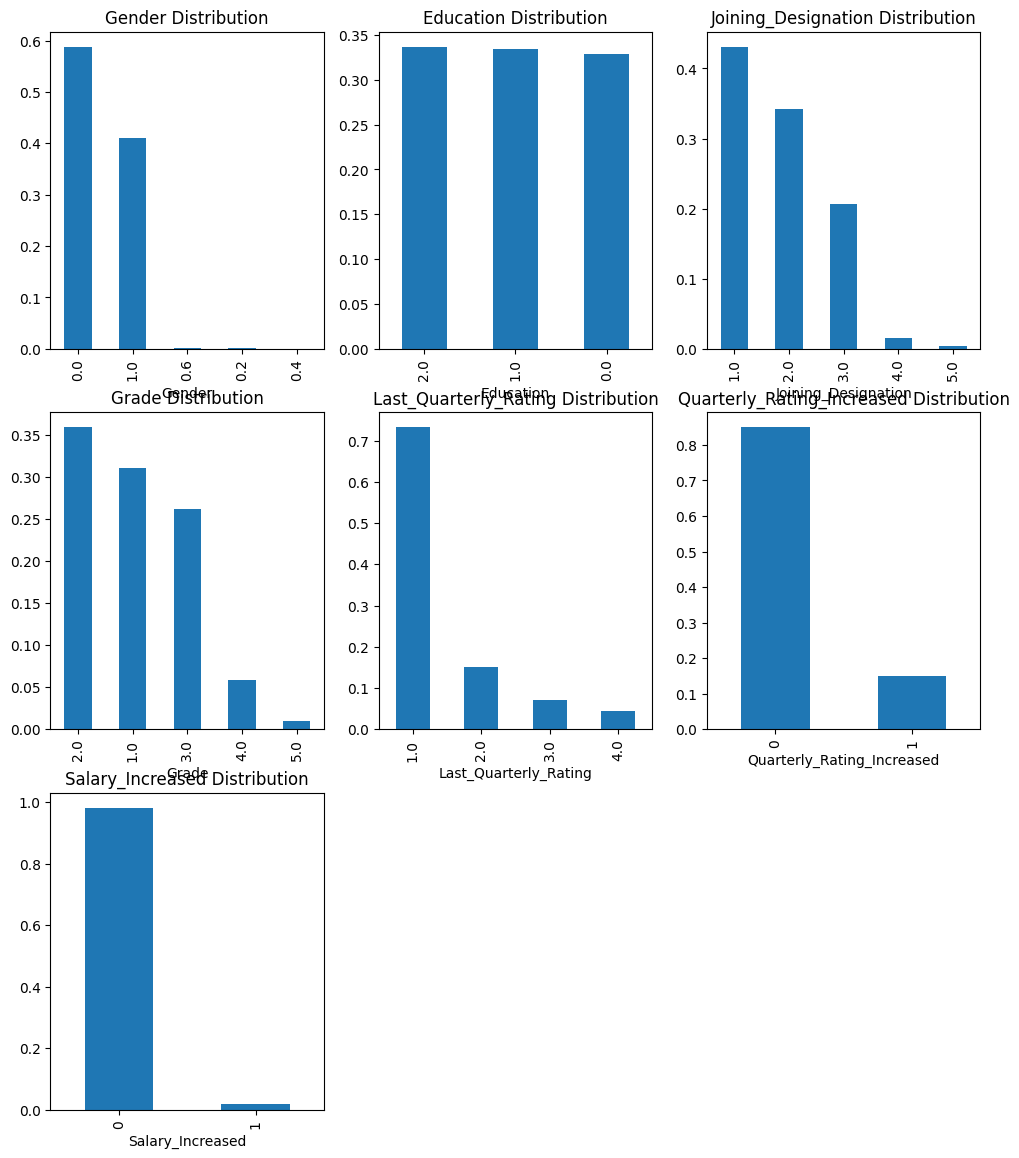

In [35]:
cols = ['Gender','Education','Joining_Designation','Grade','Last_Quarterly_Rating','Quarterly_Rating_Increased',
        'Salary_Increased']
plt.subplots(figsize=(12,14))
for i in range(len(cols)):
    plt.subplot(330+i+1)
    final_odi_df[cols[i]].value_counts(normalize=True).plot.bar(title=f'{cols[i]} Distribution')

- Around 59% employees are of the Male gender.
- The proportion of the employees who have completed their Graduate and 12th is approximately same.
- Around 43% of the employees had joining designation as 1.
- At the time of reporting, around 36% of the employees had their grade as 2.
- Around 73% of the employees had their last quarterly rating as 1.
- The quarterly rating has not increased for around 85% employees.
- The Monthly average salary has not increased for around 98% employees.

<Axes: title={'center': 'City Distribution'}, xlabel='City'>

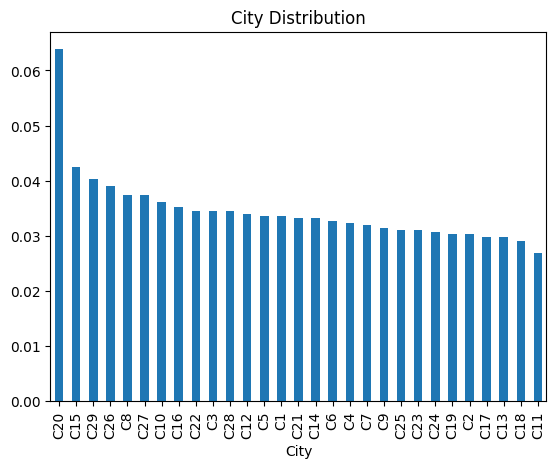

In [36]:
final_odi_df['City'].value_counts(normalize=True).plot.bar(title='City Distribution')

- Majority of the employees (6.4%) operates in C20 followed by employees from C15 (4.2%)
- Very few employees (2.6%) operates in C11.

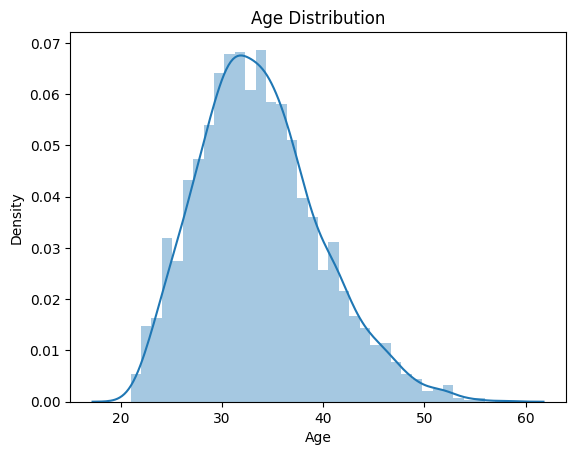

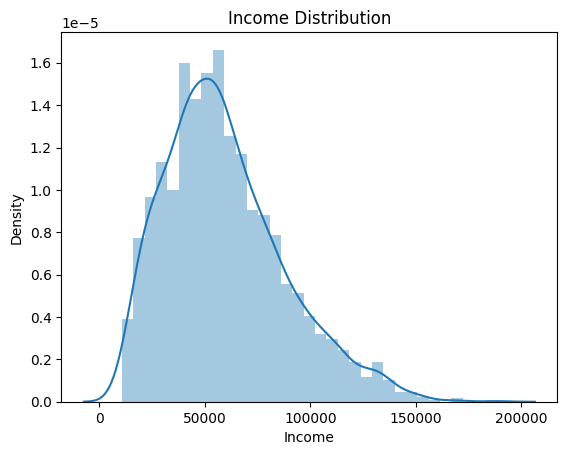

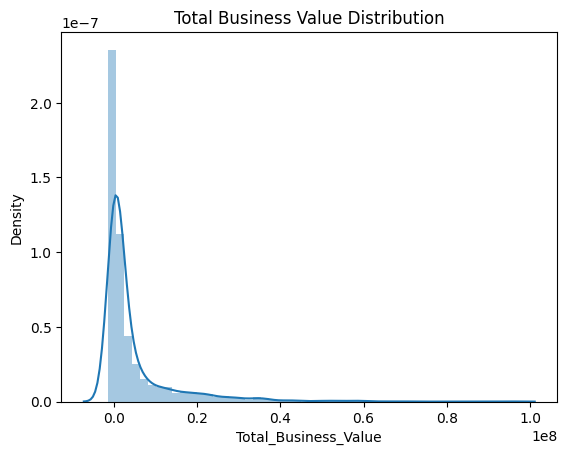

In [37]:
'''Age Distribution of Employees'''
sns.distplot (final_odi_df['Age'])
plt.title('Age Distribution')
plt.show()

'''Income Distribution of Employees'''
sns.distplot(final_odi_df['Income'])
plt.title('Income Distribution')
plt.show()

'''Total_Business_Value Distribution of Employees'''
sns.distplot(final_odi_df['Total_Business_Value'])
plt.title('Total Business Value Distribution')
plt.show()

- The distribution of Total_Business_Value is the most right skewed followed by Income and Age Distributions.

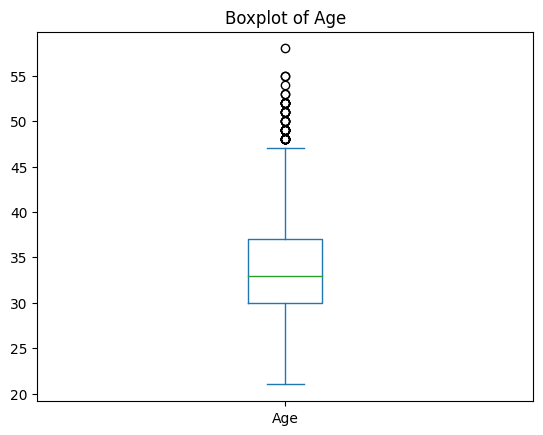

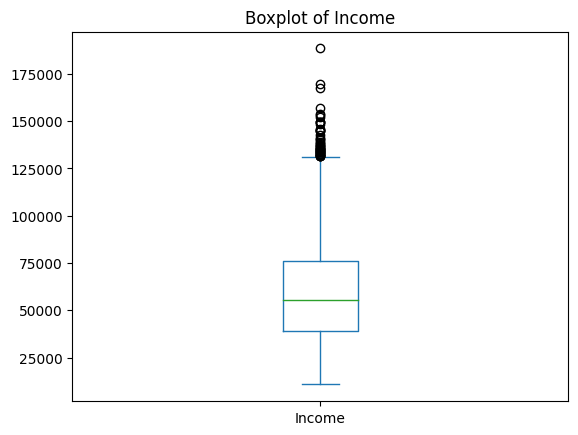

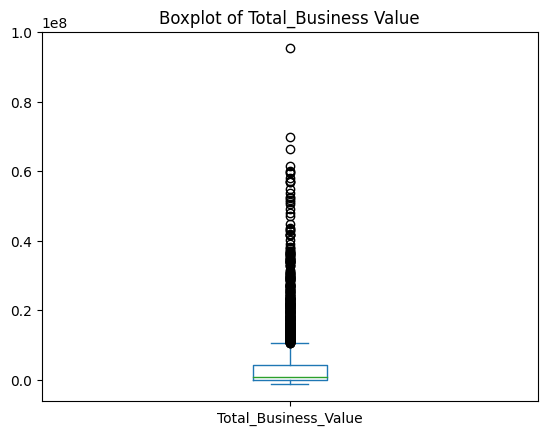

In [38]:
'''Boxplot of Age,Income and Total Business Value '''

final_odi_df['Age'].plot.box(title='Boxplot of Age')
plt.show()

final_odi_df['Income'].plot.box(title='Boxplot of Income')
plt.show()

final_odi_df['Total_Business_Value'].plot.box(title='Boxplot of Total_Business Value')
plt.show()

- Total_Business_Value has the most number of outliers followed by Income and Age.

<Axes: xlabel='Last_Quarterly_Rating', ylabel='Age'>

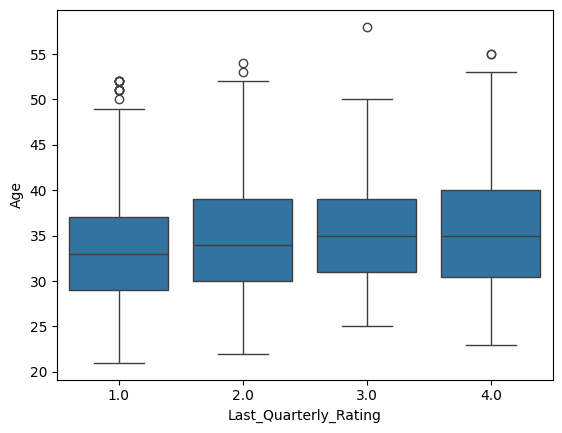

In [39]:
sns.boxplot(data= final_odi_df,x='Last_Quarterly_Rating',y='Age')

- Median Age of Employees is higher for Quarterly Rating of 4 and lower for Quarterly Rating of 1.Hence,lesser  age people are
  more likely to get lower rating.
- More Oultiers above age 50  in Quarterly Rating 1 among all quarterly ratings indicate 50 above age people are lesser among those who got quarterly raing of 1.0.

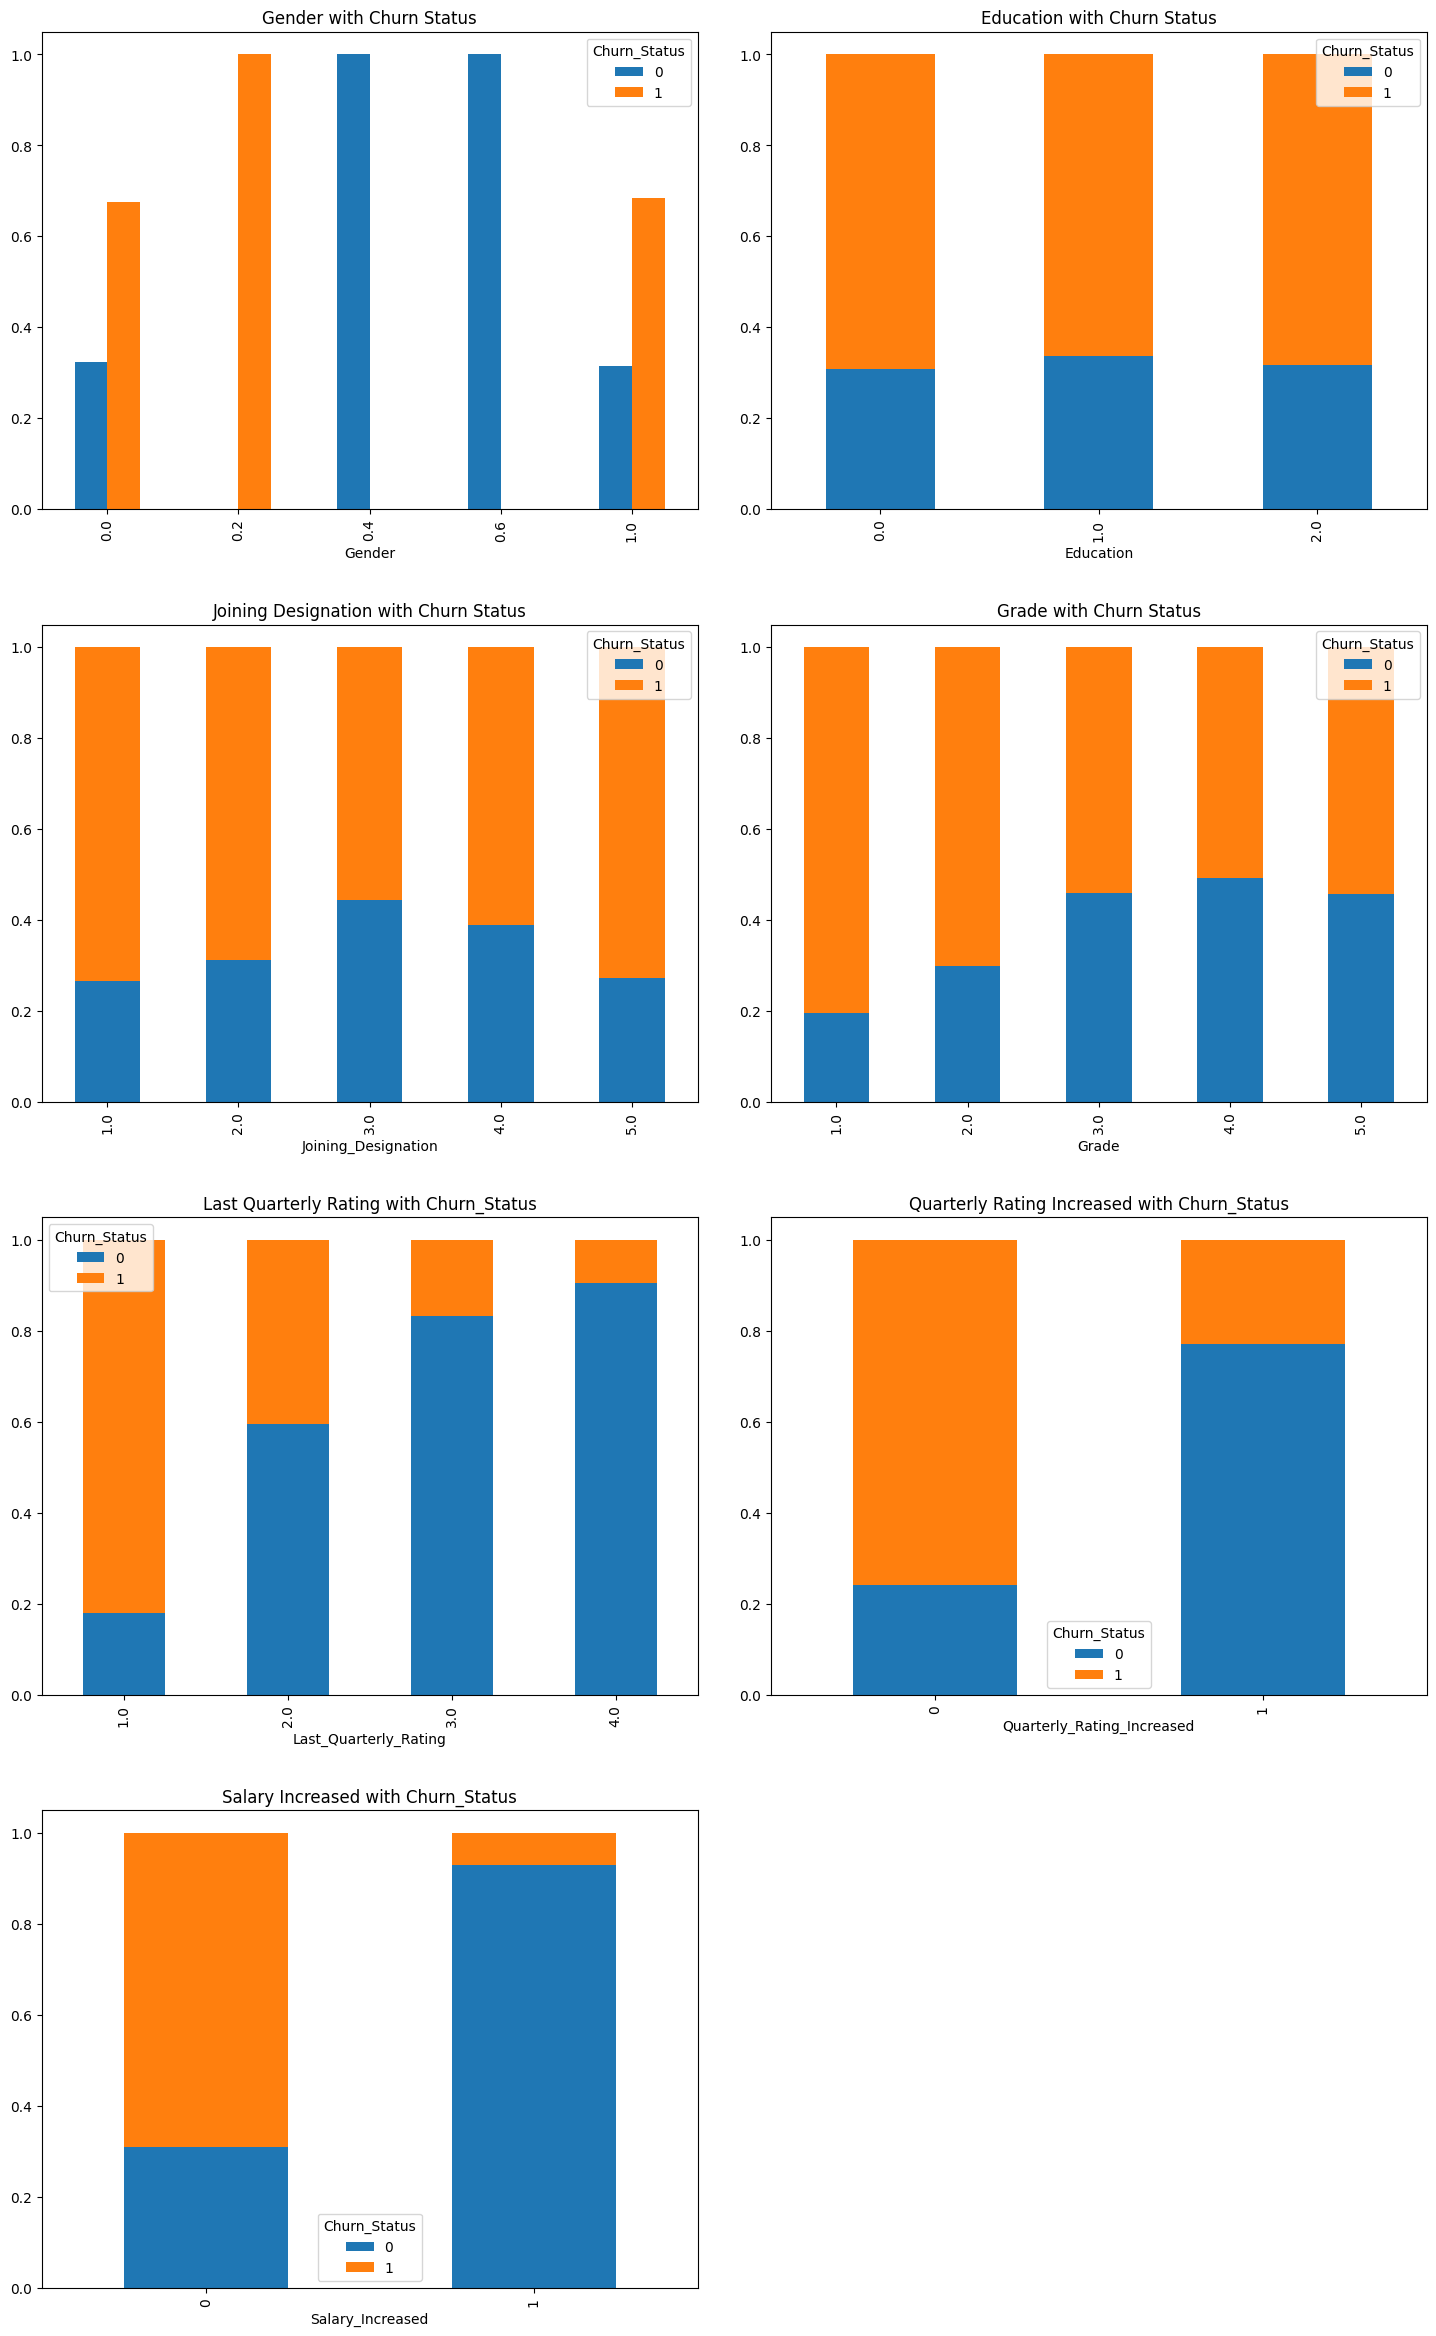

In [40]:
figure,axes=plt.subplots(4,2,figsize=(15,24))

# Gender vs Churn_Status
gender = pd.crosstab(final_odi_df['Gender'],final_odi_df['Churn_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[0,0],title='Gender with Churn Status')

# Education vs Churn_Status
education = pd.crosstab(final_odi_df['Education'],final_odi_df['Churn_Status'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,1],title="Education with Churn Status")

# Joining Designation vs Churn_Status
jde = pd.crosstab(final_odi_df['Joining_Designation'],final_odi_df['Churn_Status'])
jde.div(jde.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,0],title='Joining Designation with Churn Status')

# Grade vs Churn_Status
gd = pd.crosstab(final_odi_df['Grade'],final_odi_df['Churn_Status'])
gd.div(gd.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,1],title="Grade with Churn Status")

# Last_Quarterly_Rating vs Churn_Status
lqrtng = pd.crosstab(final_odi_df['Last_Quarterly_Rating'],final_odi_df['Churn_Status'])
lqrtng.div(lqrtng.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[2,0],title="Last Quarterly Rating with Churn_Status")

# Quarterly_Rating_Increased vs Churn_Status
qrtngi = pd.crosstab(final_odi_df['Quarterly_Rating_Increased'],final_odi_df['Churn_Status'])
qrtngi.div(qrtngi.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[2,1],title="Quarterly Rating Increased with Churn_Status")

# Salary Increased vs Churn_Status
slryi = pd.crosstab(final_odi_df['Salary_Increased'],final_odi_df['Churn_Status'])
slryi.div(slryi.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[3,0],title="Salary Increased with Churn_Status")

axes[3,1].set_axis_off()
plt.tight_layout(pad=3)

- The ratio of employees who left the company to those working in the company is same for Male and Female.
- The ratio of employees who left the company to those working in the company is same for three levels of Education.
- The employees who have their joining designation as 1 or 5  are more likely to leave the organization.
- The employees who have their grade as 1 or 2 at the time of reporting are more likely to leave the organization.
- The employees who have their last quarterly raing as 1 or 2 at the time ofreporting are less likely to leave the organization.
- The employees whose salary  has not increased and quarterly rating not improved are more likely to leave the organization.

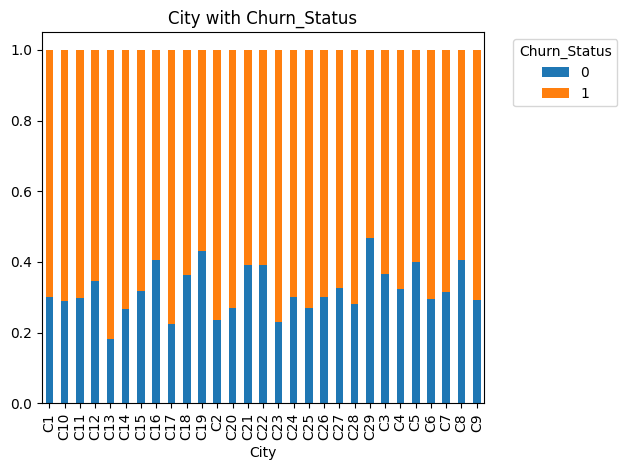

In [41]:
city = pd.crosstab(final_odi_df['City'],final_odi_df['Churn_Status'])
city.div(city.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title='City with Churn_Status')
plt.legend(title='Churn_Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

- The employees who operates in City C13 are more likely to leave the oraganization.
- The employees who operates in City C29 are less likely to leave the organization.

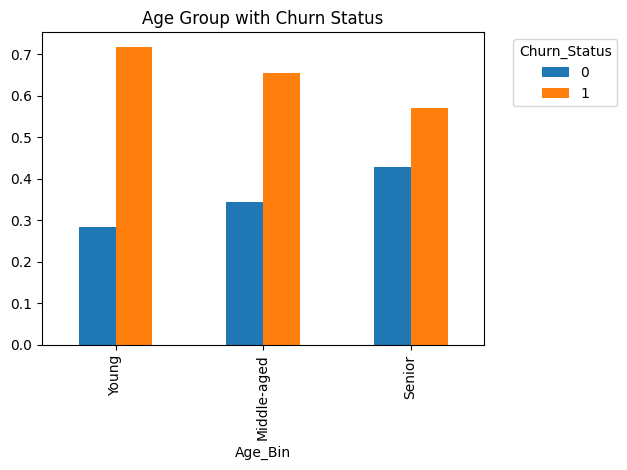

In [42]:
#Binning the Age into categories
bins = [21,31,51,float('inf')]
labels = ['Young','Middle-aged','Senior']
final_odi_df['Age_Bin'] = pd.cut(final_odi_df['Age'],bins=bins,labels=labels)
#Age feature with Churn_Status
agebin = pd.crosstab(final_odi_df['Age_Bin'],final_odi_df['Churn_Status'])
agebin.div(agebin.sum(1).astype(float),axis=0).plot(kind='bar',title='Age Group with Churn Status')
plt.legend(title='Churn_Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

- The Young Age employees (Age group of 21-30) are more likely to leave the organization.
- The Senior Age employees (51 and above) are less likely to leave the organization.

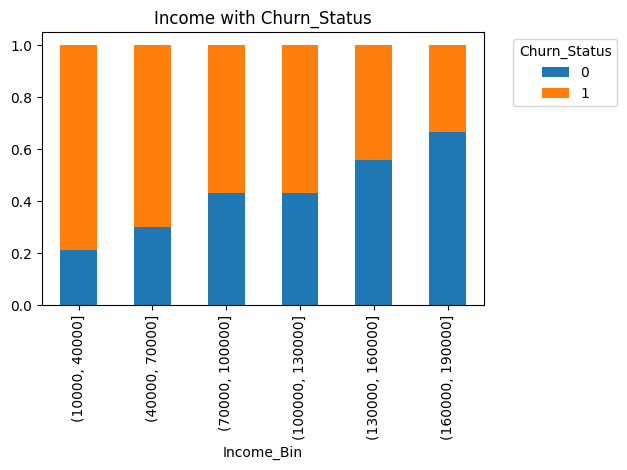

In [43]:
#Binning the Income into categories
final_odi_df['Income_Bin'] = pd.cut(final_odi_df['Income'],bins=[10000, 40000, 70000, 100000,130000,160000,190000])
#Income feature with Target
incomebin = pd.crosstab(final_odi_df['Income_Bin'],final_odi_df['Churn_Status'])
incomebin.div(incomebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title='Income with Churn_Status')
plt.legend(title='Churn_Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

- The employees whose monthly income is in 10000 -40000 or 40000-70000 are more likely to leave the organization.
- The employees whose monthly income is in 1,60,000-1,90,000 or 1,30,000-1,60,000 are less likely to leave the organization.

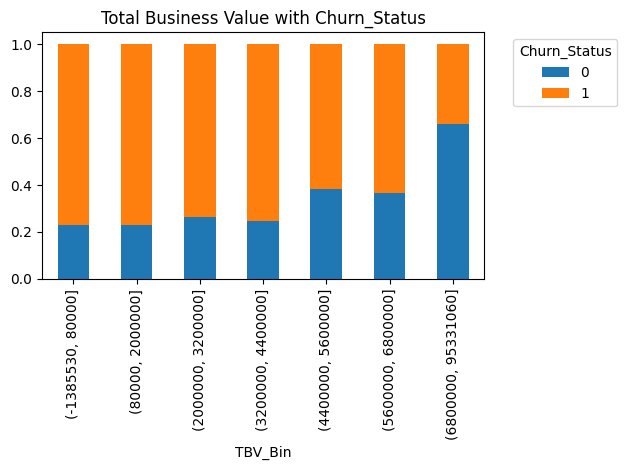

In [44]:
# Binning the Total Business Value into categories
m1 = round(final_odi_df['Total_Business_Value'].min())
m2 = round(final_odi_df['Total_Business_Value'].max())
bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2]
#Binning the Total Business Value into categories
final_odi_df['TBV_Bin'] = pd.cut(final_odi_df['Total_Business_Value'],bins)
#Total Business Value feature with Churn_Status
tbvbin = pd.crosstab(final_odi_df['TBV_Bin'],final_odi_df['Churn_Status'])
tbvbin.div(tbvbin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title='Total Business Value with Churn_Status')
plt.legend(title='Churn_Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

- The employees who have acquired total business value lesser than 44,00,000 are more likely to leave the organization.
- The employees who have acquired total business value greater than 68,00,000 are less likely to leave the organization.

## Model Building

In [45]:
# Removing the bins columns
final_odi_df.drop(columns=['Age_Bin','Income_Bin','TBV_Bin'],inplace=True)

In [46]:
# One Hot Encoding of City Column
OH_Enc_City = pd.get_dummies(final_odi_df['City'],prefix='City')
OH_Enc_City

,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2377,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
final_odi_df = pd.concat([final_odi_df,OH_Enc_City],axis=1)
final_odi_df

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,False
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,...,False,False,False,False,False,False,False,False,False,True
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,...,False,False,False,False,False,False,False,False,False,False
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [48]:
# Feature Variables
X = final_odi_df.drop(columns=['Driver_ID','Churn_Status','City'])
# Target Variable
y = final_odi_df['Churn_Status']

In [49]:
# Train Data and Test Data Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y,shuffle=True)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1904, 39), (477, 39), (1904,), (477,))

In [51]:
# Feature Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       153
           1       0.81      0.79      0.80       324

    accuracy                           0.73       477
   macro avg       0.70      0.70      0.70       477
weighted avg       0.74      0.73      0.74       477



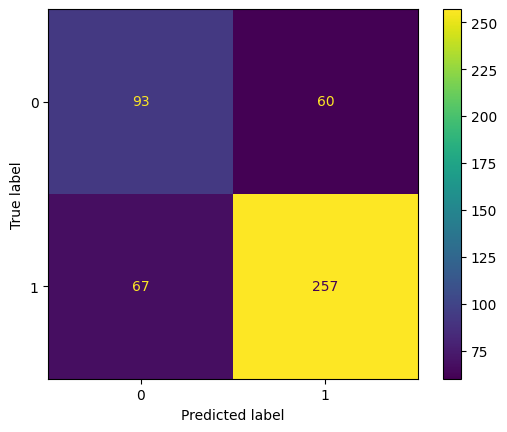

In [52]:
# Create a Decision Tree Classifier Object
clf = DecisionTreeClassifier()

# Train the Decision Tree Classifier using Train Data
clf.fit(X_train,y_train)

# Test the Decision Tree Classifier on Test Data
y_pred = clf.predict(X_test)

# Evaluate Model Metrics
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

- The Decision Tree Classifier out of all predicted 0 the measure of correctly predicted is 58%, and for 1 it is 81%(Precision).
- The Decision Tree Classifier  out of all actual 0 the measure of correctly predicted is 59%, and for 1 it is 80%(Recall).

## Ensemble Learning : Bagging

### Random Forest Classifier

Best parameters are : {'max_depth': 4, 'n_estimators': 150}
The score is : 0.8566813478581716
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       153
           1       0.85      0.87      0.86       324

    accuracy                           0.81       477
   macro avg       0.78      0.77      0.77       477
weighted avg       0.80      0.81      0.81       477



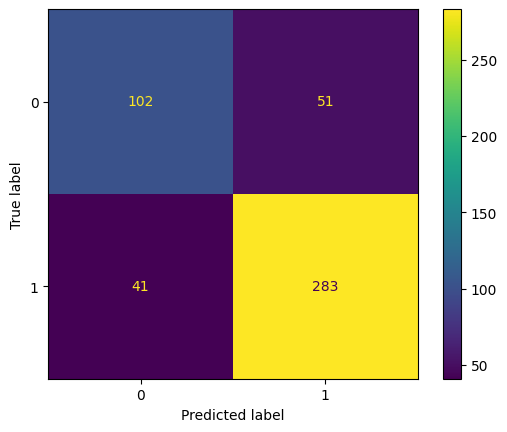

In [53]:
params = {
          'n_estimators' : [50,100,150,200],
          'max_depth' : [2,3,4]
         }

rf_clf = RandomForestClassifier(class_weight ='balanced')

grid = GridSearchCV(estimator=rf_clf,param_grid=params,cv=3,scoring='f1')

grid.fit(X_train,y_train)

def display(results):
 print(f'Best parameters are : {results.best_params_}')
 print(f'The score is : {results.best_score_}')
display(grid)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

- The Random Forest With Class Weighting method out of all predicted 0 the measure of correctly predicted is 71%, and for 1 it is 85%(Precision).
- The Random Forest With Class Weighting method out of all actual 0 the measure of correctly predicted is 67%, and for 1 it is 87%(Recall).

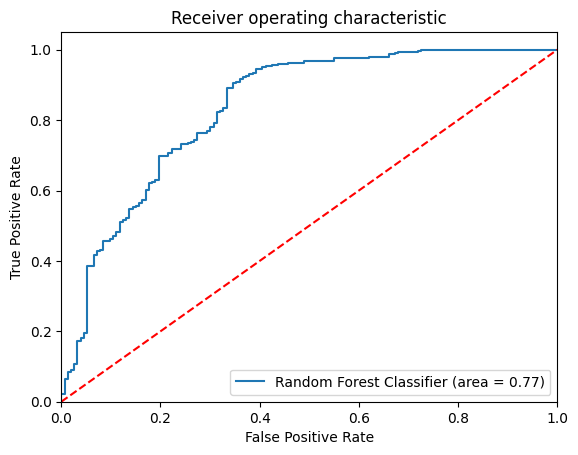

In [54]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Best parameters are : {'max_depth': 4, 'n_estimators': 150}
The score is : 0.8566813478581716
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       153
           1       0.85      0.86      0.85       324

    accuracy                           0.80       477
   macro avg       0.77      0.77      0.77       477
weighted avg       0.80      0.80      0.80       477



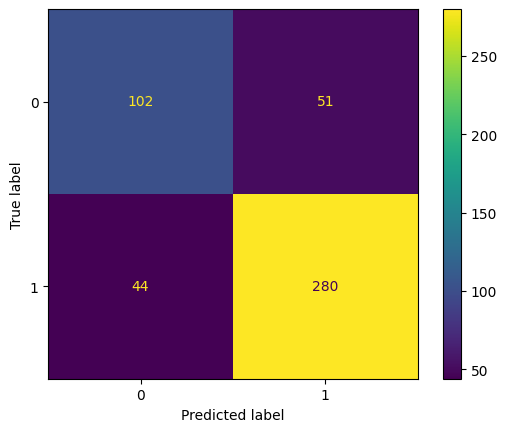

In [55]:
params = {
          'n_estimators' : [50,100,150,200],
          'max_depth' : [2,3,4]
         }

rf_clf = RandomForestClassifier(class_weight ='balanced_subsample')

grid1 = GridSearchCV(estimator=rf_clf,param_grid=params,cv=3,scoring='f1')

grid1.fit(X_train,y_train)

def display(results):
 print(f'Best parameters are : {results.best_params_}')
 print(f'The score is : {results.best_score_}')
display(grid)

y_pred = grid1.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

- The Random Forest With Bootstrap Class Weighting method out of all predicted 0 the measure of correctly predicted is 69%, and for 1 it is 84%(Precision).
- The Random Forest With Bootstrap Class Weighting method out of all actual 0 the measure of correctly predicted is 66%, and for 1 it is 86%(Recall).

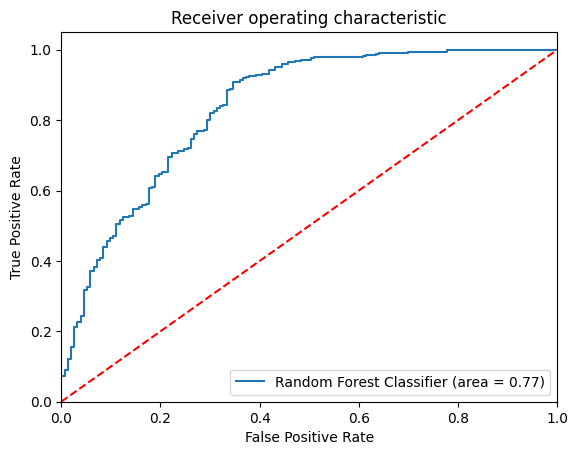

In [56]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,grid1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- The RandomForestClassifier with class_weight = balanced has roc_score of 0.77 and with class_weight = balanced_subsample
  has roc_score of 0.76 which  implies RandomForestClassifier with class_weight = balanced performs slightly better.
- Moreover,RandomForestClassifier with class_weight = balanced has better f1score of Class-1 than with class_weight = balanced.

## Ensemble Learning : Boosting

### XGBoost Classifier

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       153
           1       0.82      0.89      0.85       324

    accuracy                           0.79       477
   macro avg       0.77      0.74      0.75       477
weighted avg       0.79      0.79      0.79       477



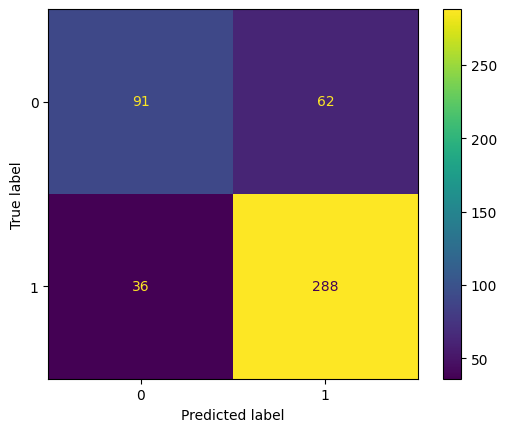

In [57]:
xgb_model = xgb.XGBClassifier(class_weight ='balanced')

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

- The XGBoost method out of all predicted 0 the measure of correctly predicted is 72% and for 1 it is 82%(Precision).
- The XGBoost method out of all actual 0 the measure of correctly predicted is 59% and for 1 it is 89%(Recall).

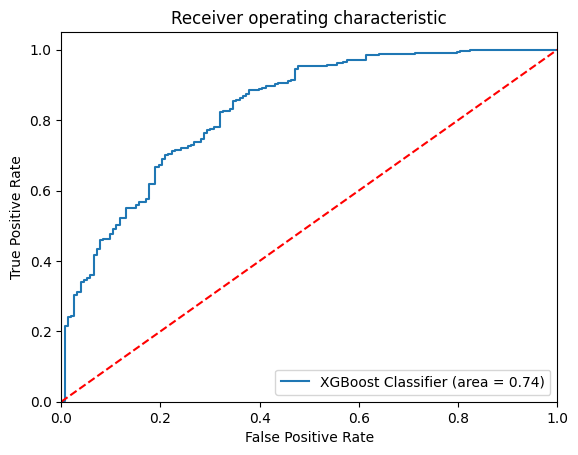

In [58]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='XGBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- The xgbclassifer has roc_score of 0.74 and it is lesser than that of RandomForestClassifier.
- Moreover,xgbclassifer has lesser f1score of Class-1 than RandomForestClassifier.

### Feature Importance for the best model so far in Random Forest Model

In [59]:
rfc = RandomForestClassifier(max_depth = 4, n_estimators= 50, class_weight="balanced")

rfc.fit(X_train, y_train)

print("Score of RandomForestClassifier: ", rfc.score(X_test, y_test))

Score of RandomForestClassifier:  0.8071278825995807


In [60]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

In [61]:
pd.DataFrame(zip(X.columns,std)).sort_values(by=[1], ascending=False)

,0,1
7,Last_Quarterly_Rating,0.317244
8,Quarterly_Rating_Increased,0.246168
6,Total_Business_Value,0.227734
5,Grade,0.121791
3,Income,0.088803
4,Joining_Designation,0.068832
9,Salary_Increased,0.045822
0,Age,0.025654
1,Gender,0.012534
31,City_C29,0.011061


In [62]:
f_imp_df = pd.DataFrame(zip(X.columns,importances)).sort_values(by=[1], ascending=False)
f_imp_df

,0,1
7,Last_Quarterly_Rating,0.288029
8,Quarterly_Rating_Increased,0.232580
6,Total_Business_Value,0.206716
5,Grade,0.076744
3,Income,0.058603
4,Joining_Designation,0.038970
9,Salary_Increased,0.027818
0,Age,0.021855
20,City_C19,0.003693
1,Gender,0.003560


<Axes: xlabel='1', ylabel='0'>

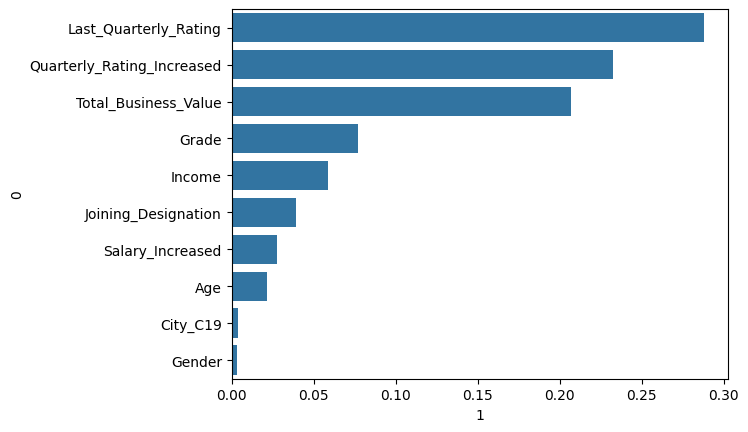

In [63]:
sns.barplot(data=f_imp_df.head(10),x=1,y=0)

- Last_Quarterly_Rating,Total_Business_Value and Quarterly_Rating_Increased are the most important features.

## Recommendations

- Overall, the employees with following profiles are more likely to leave the organization:
  * Lower Last_Quarterly Rating
  * Total business value lesser than 44,00,000
  * Drivers with both Quarterly Rating not improved and no salary increment.
  * Lower income (less than 70000) Joining Designation of 1 or 5 and Lower Grade
  * Young Age group people (Age of 21-30)
  
 *The guidelines for securing good rating,improving Business value and grade shall be provided to drivers at time of joining  the organization.The periodical surveys shall be done to get their opinion on working and issues if any are facing in following guidelines.

- Since, the Driver Retention is the primary objective,the model should be able to correctly identify the drivers/employees who  are leaving the organization.Hence,Recall shall be primary focus to retain drivers.

- Recall of class-0 i.e. the employees working in organization is low which implies model unable to predict correctly drivers working in organization.This might be due to unbalance which shall be rectifed by collecting data of those who have not left the organization.

- The Cities description shall be more detailed with their full names and states inorder to understand the effect of region on churn rate of drivers.

- Additional features such as Customer_Rating, Reviews in form of customer satisfaction surveys shall be collected.

- Feedback shall be taken from drivers who left the organization regarding company working environment and other growth factors which aid in providing to existing employees those things to retain them.